In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid') 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [7]:
df=pd.read_csv("C:/Users/gheva/OneDrive/Desktop/Toyota MLR.csv")
df

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1436 rows x 11 columns]

## EDA##

In [9]:
df.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [11]:
df.tail()

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114

In [13]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [15]:
df.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [19]:
df.rename(columns={'Age_08_04':'Age'},inplace=True)


In [21]:
df=df.drop('Fuel_Type',axis=1)


In [23]:
df

Price  Age     KM   HP  Automatic    cc  Doors  Cylinders  Gears  Weight
0     13500   23  46986   90          0  2000      3          4      5    1165
1     13750   23  72937   90          0  2000      3          4      5    1165
2     13950   24  41711   90          0  2000      3          4      5    1165
3     14950   26  48000   90          0  2000      3          4      5    1165
4     13750   30  38500   90          0  2000      3          4      5    1170
...     ...  ...    ...  ...        ...   ...    ...        ...    ...     ...
1431   7500   69  20544   86          0  1300      3          4      5    1025
1432  10845   72  19000   86          0  1300      3          4      5    1015
1433   8500   71  17016   86          0  1300      3          4      5    1015
1434   7250   70  16916   86          0  1300      3          4      5    1015
1435   6950   76      1  110          0  1600      5          4      5    1114

[1436 rows x 10 columns]

In [ ]:
## Spliting Dataset##

In [25]:
X=df.iloc[:,1:13]
y=df.iloc[:,0]

In [27]:
X

Age     KM   HP  Automatic    cc  Doors  Cylinders  Gears  Weight
0      23  46986   90          0  2000      3          4      5    1165
1      23  72937   90          0  2000      3          4      5    1165
2      24  41711   90          0  2000      3          4      5    1165
3      26  48000   90          0  2000      3          4      5    1165
4      30  38500   90          0  2000      3          4      5    1170
...   ...    ...  ...        ...   ...    ...        ...    ...     ...
1431   69  20544   86          0  1300      3          4      5    1025
1432   72  19000   86          0  1300      3          4      5    1015
1433   71  17016   86          0  1300      3          4      5    1015
1434   70  16916   86          0  1300      3          4      5    1015
1435   76      1  110          0  1600      5          4      5    1114

[1436 rows x 9 columns]

In [29]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


## Model Building##

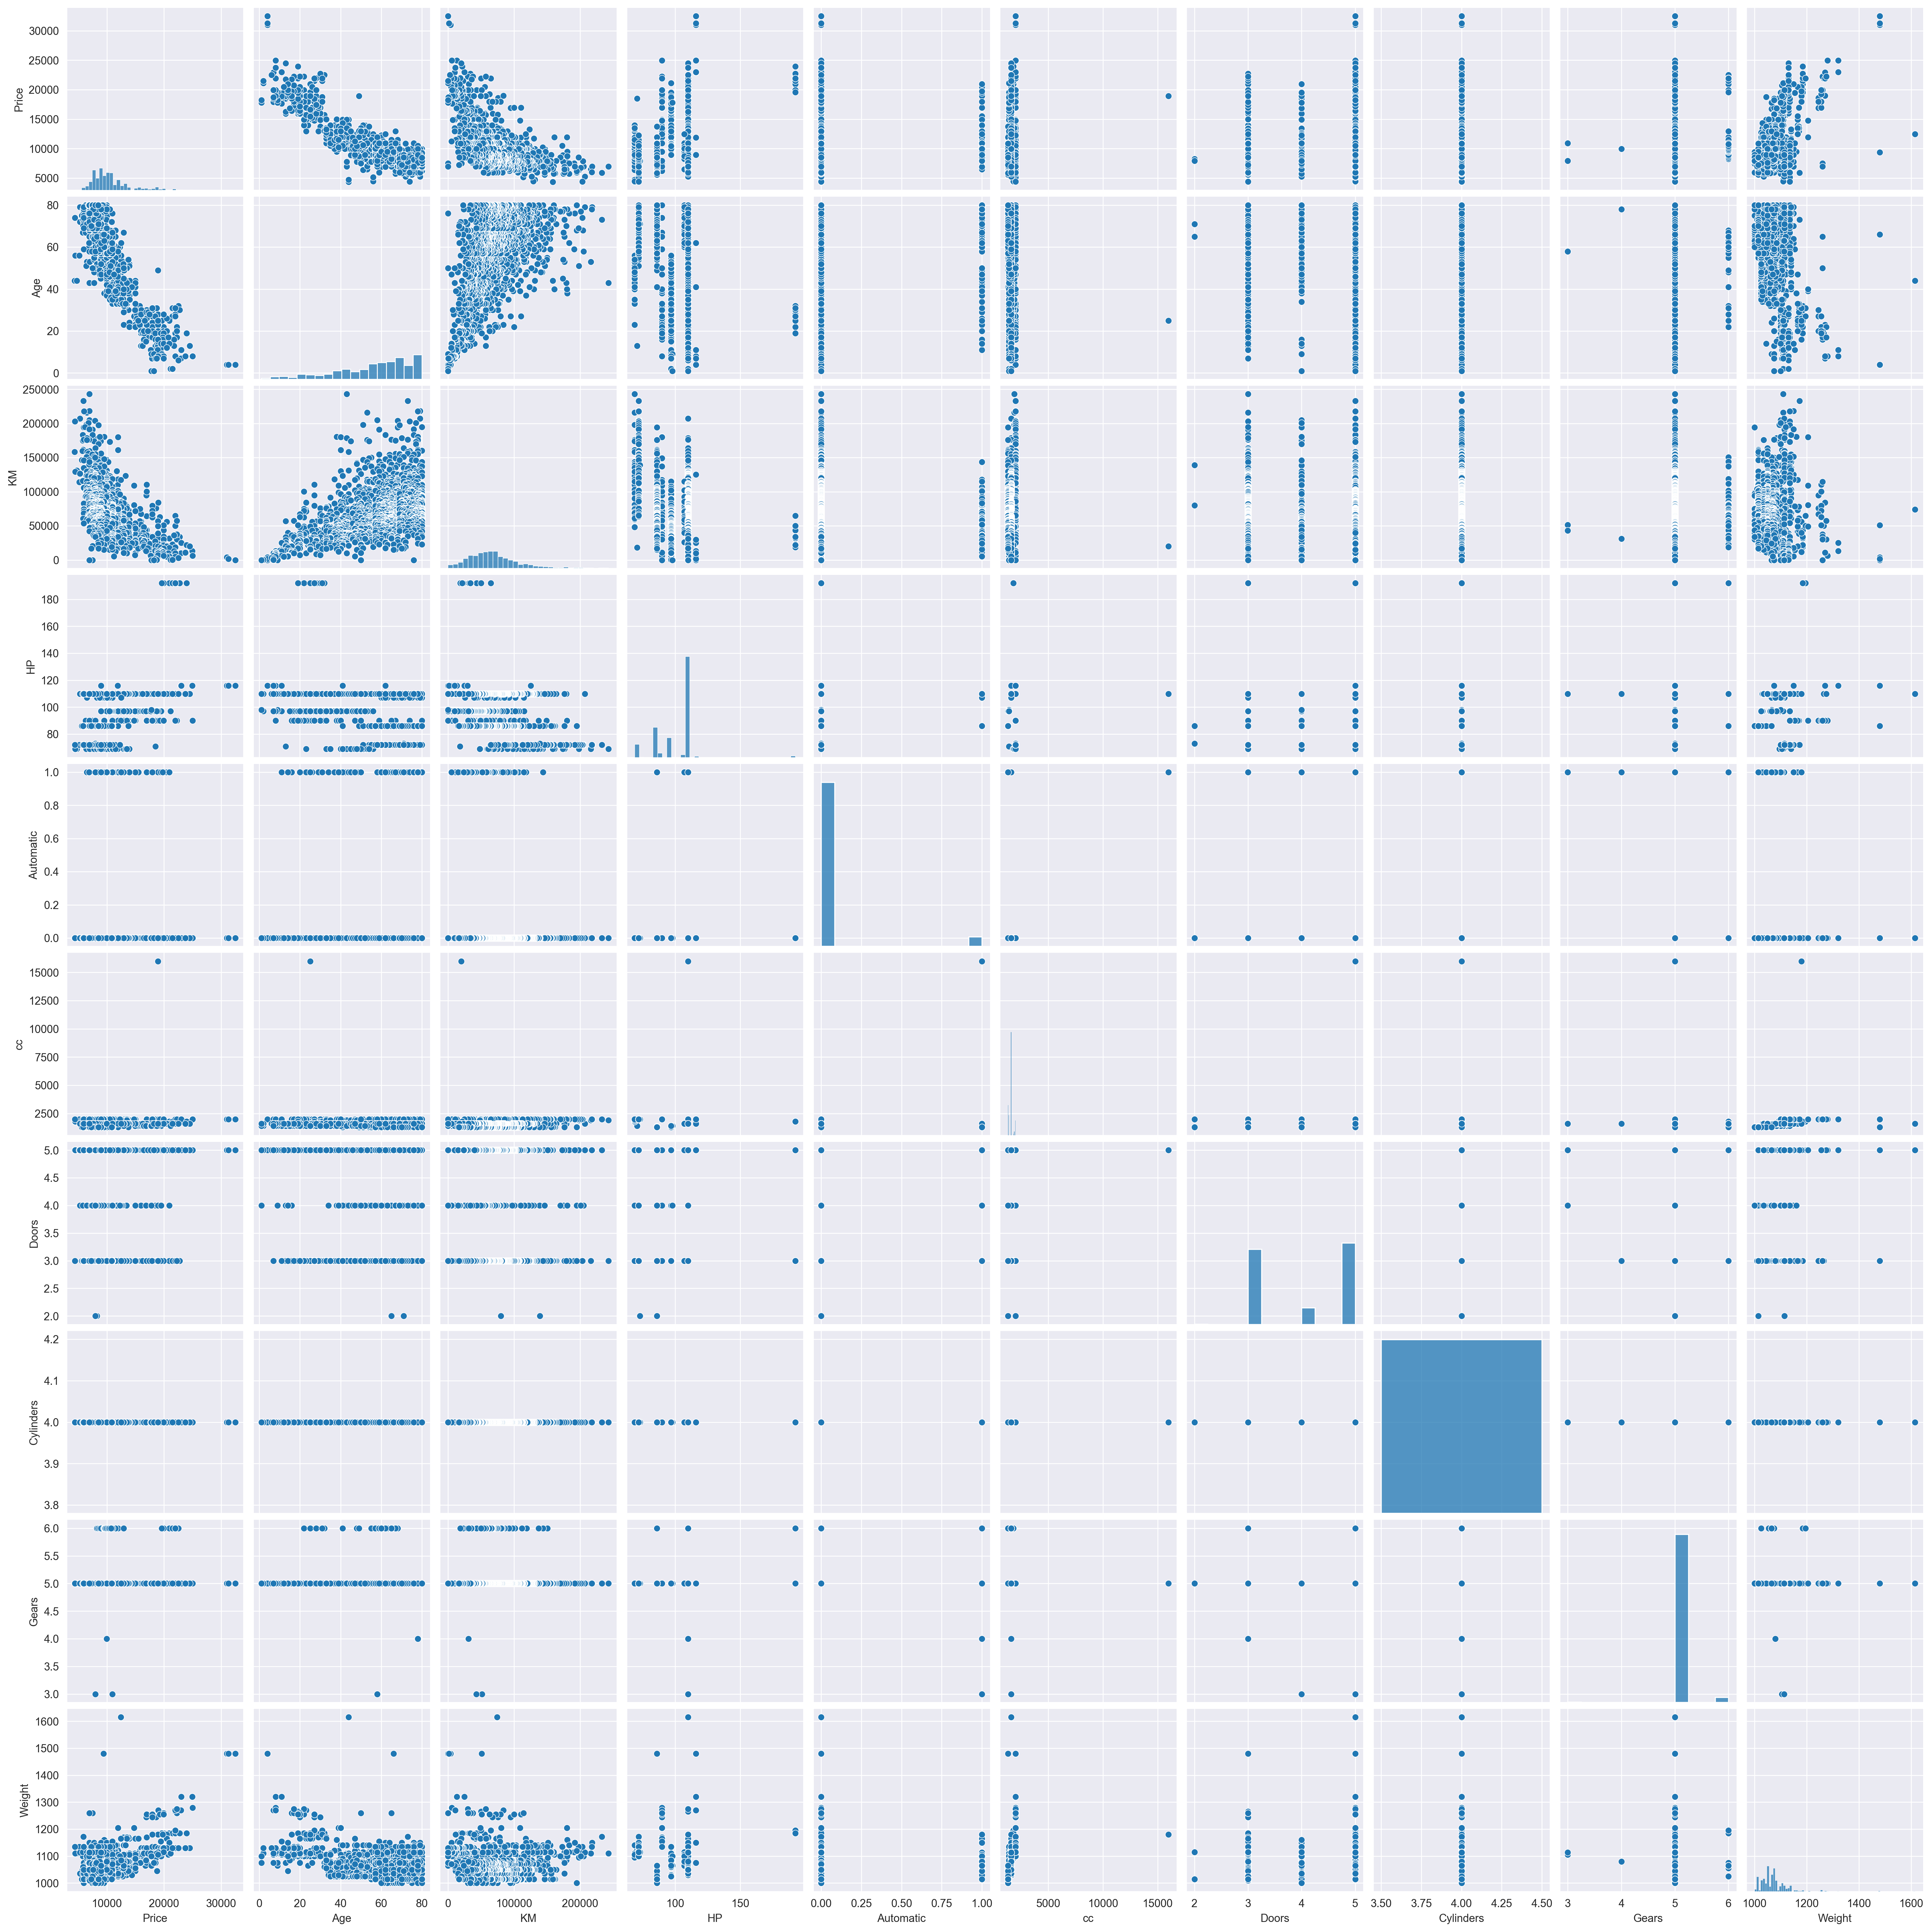

In [34]:
sns.pairplot(df)

<Axes: >

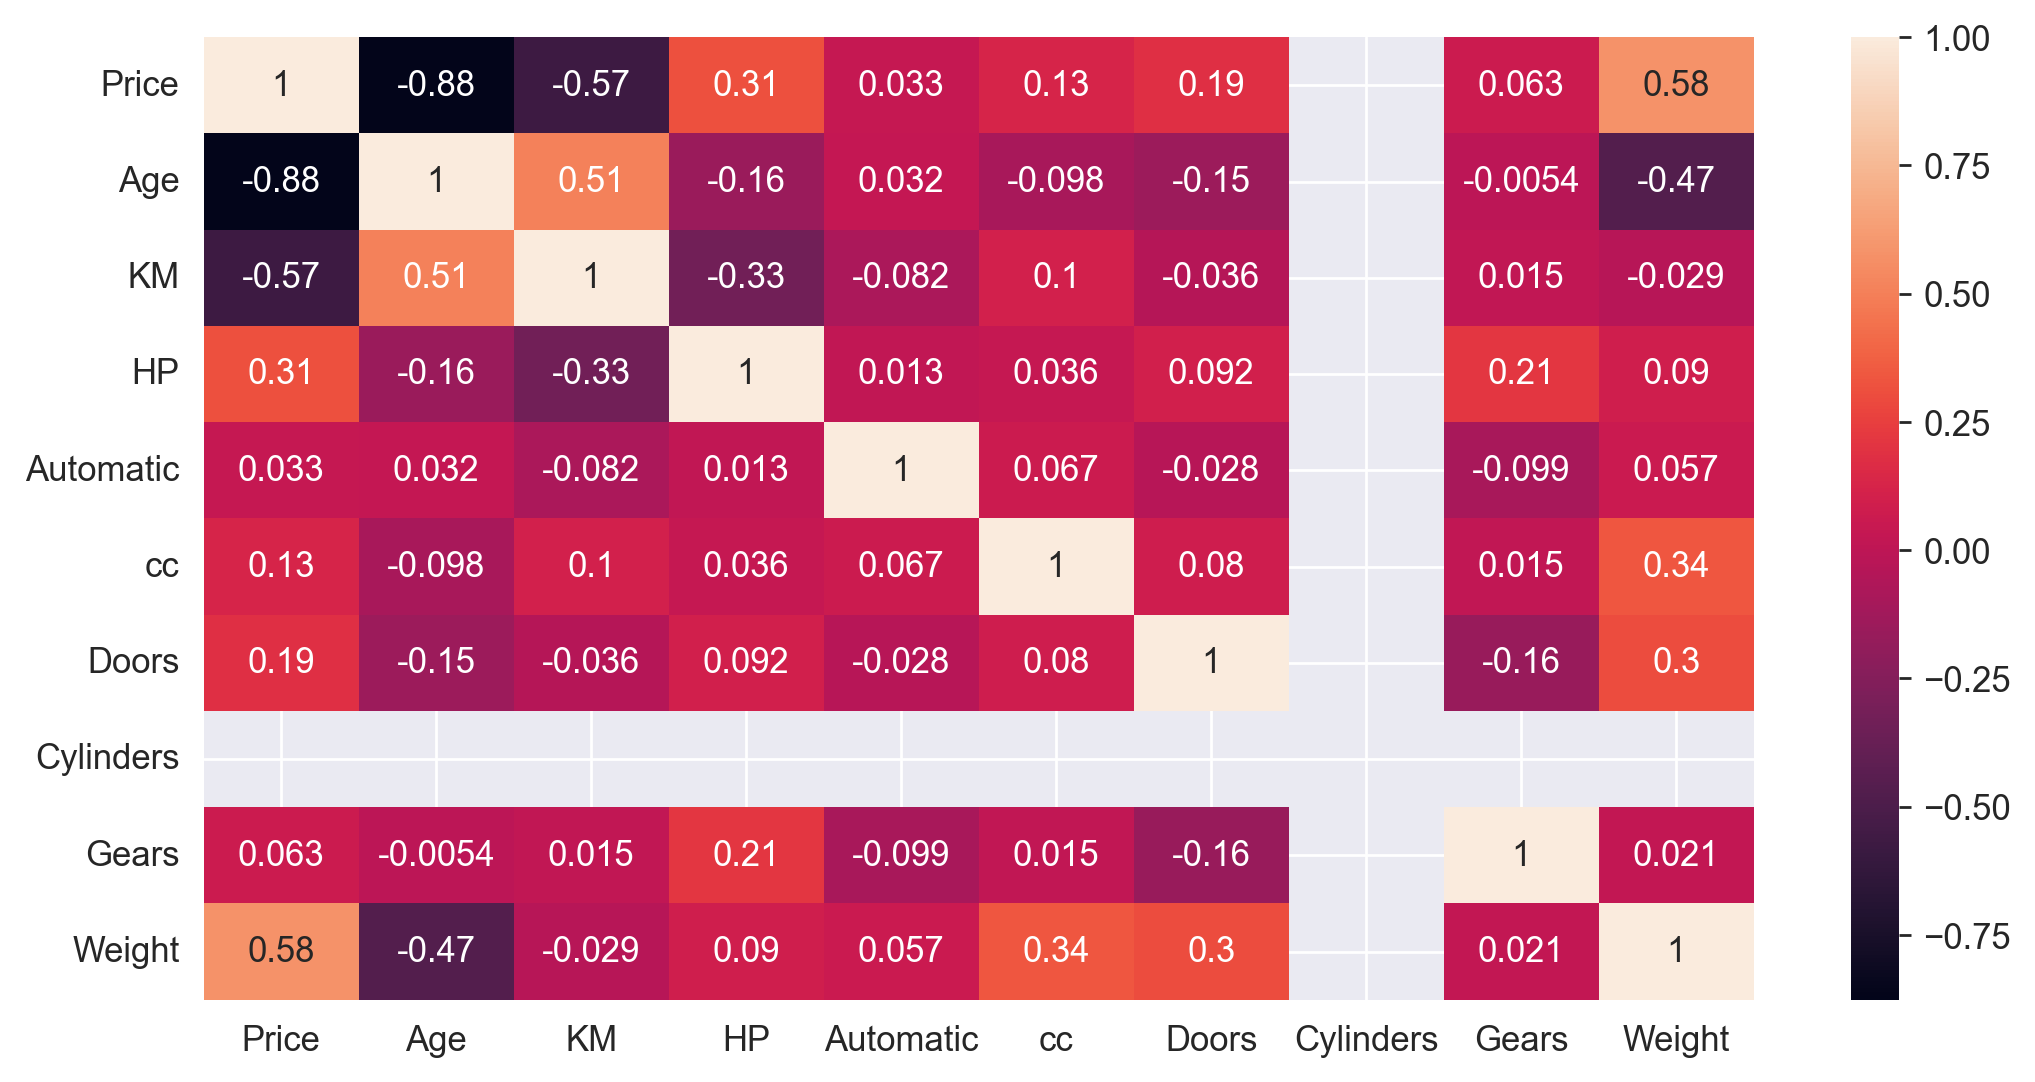

In [72]:

sns.heatmap(df.corr(),annot=True)

In [33]:
model = smf.ols('Price~Age+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data=df).fit()

In [35]:
model.pvalues
## The all column values are less than alpha so all columns are important.

Intercept     7.202023e-08
Age          1.214440e-289
KM            2.316427e-52
HP            1.214261e-26
Automatic     1.756409e-02
cc            2.605449e-01
Doors         9.174788e-01
Cylinders     7.202023e-08
Gears         7.362823e-04
Weight        1.983857e-88
dtype: float64

In [37]:
##Calculate VIF##
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
df.head()

Price  Age     KM  HP  Automatic    cc  Doors  Cylinders  Gears  Weight
0  13500   23  46986  90          0  2000      3          4      5    1165
1  13750   23  72937  90          0  2000      3          4      5    1165
2  13950   24  41711  90          0  2000      3          4      5    1165
3  14950   26  48000  90          0  2000      3          4      5    1165
4  13750   30  38500  90          0  2000      3          4      5    1170

In [41]:
data = df.drop(columns=['Price'])
data

Age     KM   HP  Automatic    cc  Doors  Cylinders  Gears  Weight
0      23  46986   90          0  2000      3          4      5    1165
1      23  72937   90          0  2000      3          4      5    1165
2      24  41711   90          0  2000      3          4      5    1165
3      26  48000   90          0  2000      3          4      5    1165
4      30  38500   90          0  2000      3          4      5    1170
...   ...    ...  ...        ...   ...    ...        ...    ...     ...
1431   69  20544   86          0  1300      3          4      5    1025
1432   72  19000   86          0  1300      3          4      5    1015
1433   71  17016   86          0  1300      3          4      5    1015
1434   70  16916   86          0  1300      3          4      5    1015
1435   76      1  110          0  1600      5          4      5    1114

[1436 rows x 9 columns]

In [43]:
list1 = []
for i in range(1,11):
  list1.append(i*2)

In [45]:
list1

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [47]:
data

Age     KM   HP  Automatic    cc  Doors  Cylinders  Gears  Weight
0      23  46986   90          0  2000      3          4      5    1165
1      23  72937   90          0  2000      3          4      5    1165
2      24  41711   90          0  2000      3          4      5    1165
3      26  48000   90          0  2000      3          4      5    1165
4      30  38500   90          0  2000      3          4      5    1170
...   ...    ...  ...        ...   ...    ...        ...    ...     ...
1431   69  20544   86          0  1300      3          4      5    1025
1432   72  19000   86          0  1300      3          4      5    1015
1433   71  17016   86          0  1300      3          4      5    1015
1434   70  16916   86          0  1300      3          4      5    1015
1435   76      1  110          0  1600      5          4      5    1114

[1436 rows x 9 columns]

In [49]:
data.values

array([[   23, 46986,    90, ...,     4,     5,  1165],
       [   23, 72937,    90, ...,     4,     5,  1165],
       [   24, 41711,    90, ...,     4,     5,  1165],
       ...,
       [   71, 17016,    86, ...,     4,     5,  1015],
       [   70, 16916,    86, ...,     4,     5,  1015],
       [   76,     1,   110, ...,     4,     5,  1114]], dtype=int64)

In [51]:
vif = pd.DataFrame()
vif

Empty DataFrame
Columns: []
Index: []

In [53]:
vif['Features'] = data.columns
vif

Features
0        Age
1         KM
2         HP
3  Automatic
4         cc
5      Doors
6  Cylinders
7      Gears
8     Weight

In [55]:
range(len(data.columns)) 

range(0, 9)

In [57]:
[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

[1.9096758965289695,
 1.6791422893506158,
 1.2180660746263758,
 1.0476766955768921,
 1.1508978507303198,
 1.1554835700950614,
 1378.328903939661,
 1.1091875292355355,
 1.6649104614100683]

In [59]:

vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

In [61]:
vif

Features          VIF
0        Age     1.909676
1         KM     1.679142
2         HP     1.218066
3  Automatic     1.047677
4         cc     1.150898
5      Doors     1.155484
6  Cylinders  1378.328904
7      Gears     1.109188
8     Weight     1.664910

Here  Cylinders column creates the multicolliearity problem.

## Subset Selection##

In [63]:
cylinders = smf.ols('Price~Age+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data = df).fit()
cylinders.rsquared, cylinders.aic

(0.8634360809289678, 24772.515714430712)

#### Model Validation Techniques####
## 1) Residual Analysis##

In [65]:

model = smf.ols('Price~Age+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data=df).fit()
model.rsquared

0.8634360809289678

In [67]:
import statsmodels.api as sm 

In [69]:
df.head()

Price  Age     KM  HP  Automatic    cc  Doors  Cylinders  Gears  Weight
0  13500   23  46986  90          0  2000      3          4      5    1165
1  13750   23  72937  90          0  2000      3          4      5    1165
2  13950   24  41711  90          0  2000      3          4      5    1165
3  14950   26  48000  90          0  2000      3          4      5    1165
4  13750   30  38500  90          0  2000      3          4      5    1170

In [71]:
model.fittedvalues

0       16523.674408
1       16018.794418
2       16503.215800
3       16134.693709
4       15920.291308
            ...     
1431     8725.773446
1432     8200.335966
1433     8362.019338
1434     8487.049251
1435    10566.629336
Length: 1436, dtype: float64

In [73]:
model.params

Intercept    -419.405531
Age          -123.084400
KM             -0.019455
HP             28.499119
Automatic     376.315487
cc             -0.100953
Doors          -4.148726
Cylinders   -1677.622124
Gears         670.616336
Weight         18.622299
dtype: float64

In [75]:
model.resid

0      -3023.674408
1      -2268.794418
2      -2553.215800
3      -1184.693709
4      -2170.291308
           ...     
1431   -1225.773446
1432    2644.664034
1433     137.980662
1434   -1237.049251
1435   -3616.629336
Length: 1436, dtype: float64

In [77]:
Q-Q Plot
sm.qqplot(model.resid, line='q');

SyntaxError: invalid syntax (4237809356.py, line 1)

In [79]:
np.argmax(model.resid),np.max(model.resid)

(147, 6269.946275163875)

## 2) Residual Plot of Homoscedasticity##

In [81]:
model.params

Intercept    -419.405531
Age          -123.084400
KM             -0.019455
HP             28.499119
Automatic     376.315487
cc             -0.100953
Doors          -4.148726
Cylinders   -1677.622124
Gears         670.616336
Weight         18.622299
dtype: float64

In [83]:
model.fittedvalues

0       16523.674408
1       16018.794418
2       16503.215800
3       16134.693709
4       15920.291308
            ...     
1431     8725.773446
1432     8200.335966
1433     8362.019338
1434     8487.049251
1435    10566.629336
Length: 1436, dtype: float64

In [85]:
model.resid

0      -3023.674408
1      -2268.794418
2      -2553.215800
3      -1184.693709
4      -2170.291308
           ...     
1431   -1225.773446
1432    2644.664034
1433     137.980662
1434   -1237.049251
1435   -3616.629336
Length: 1436, dtype: float64

Text(0, 0.5, 'Errors')

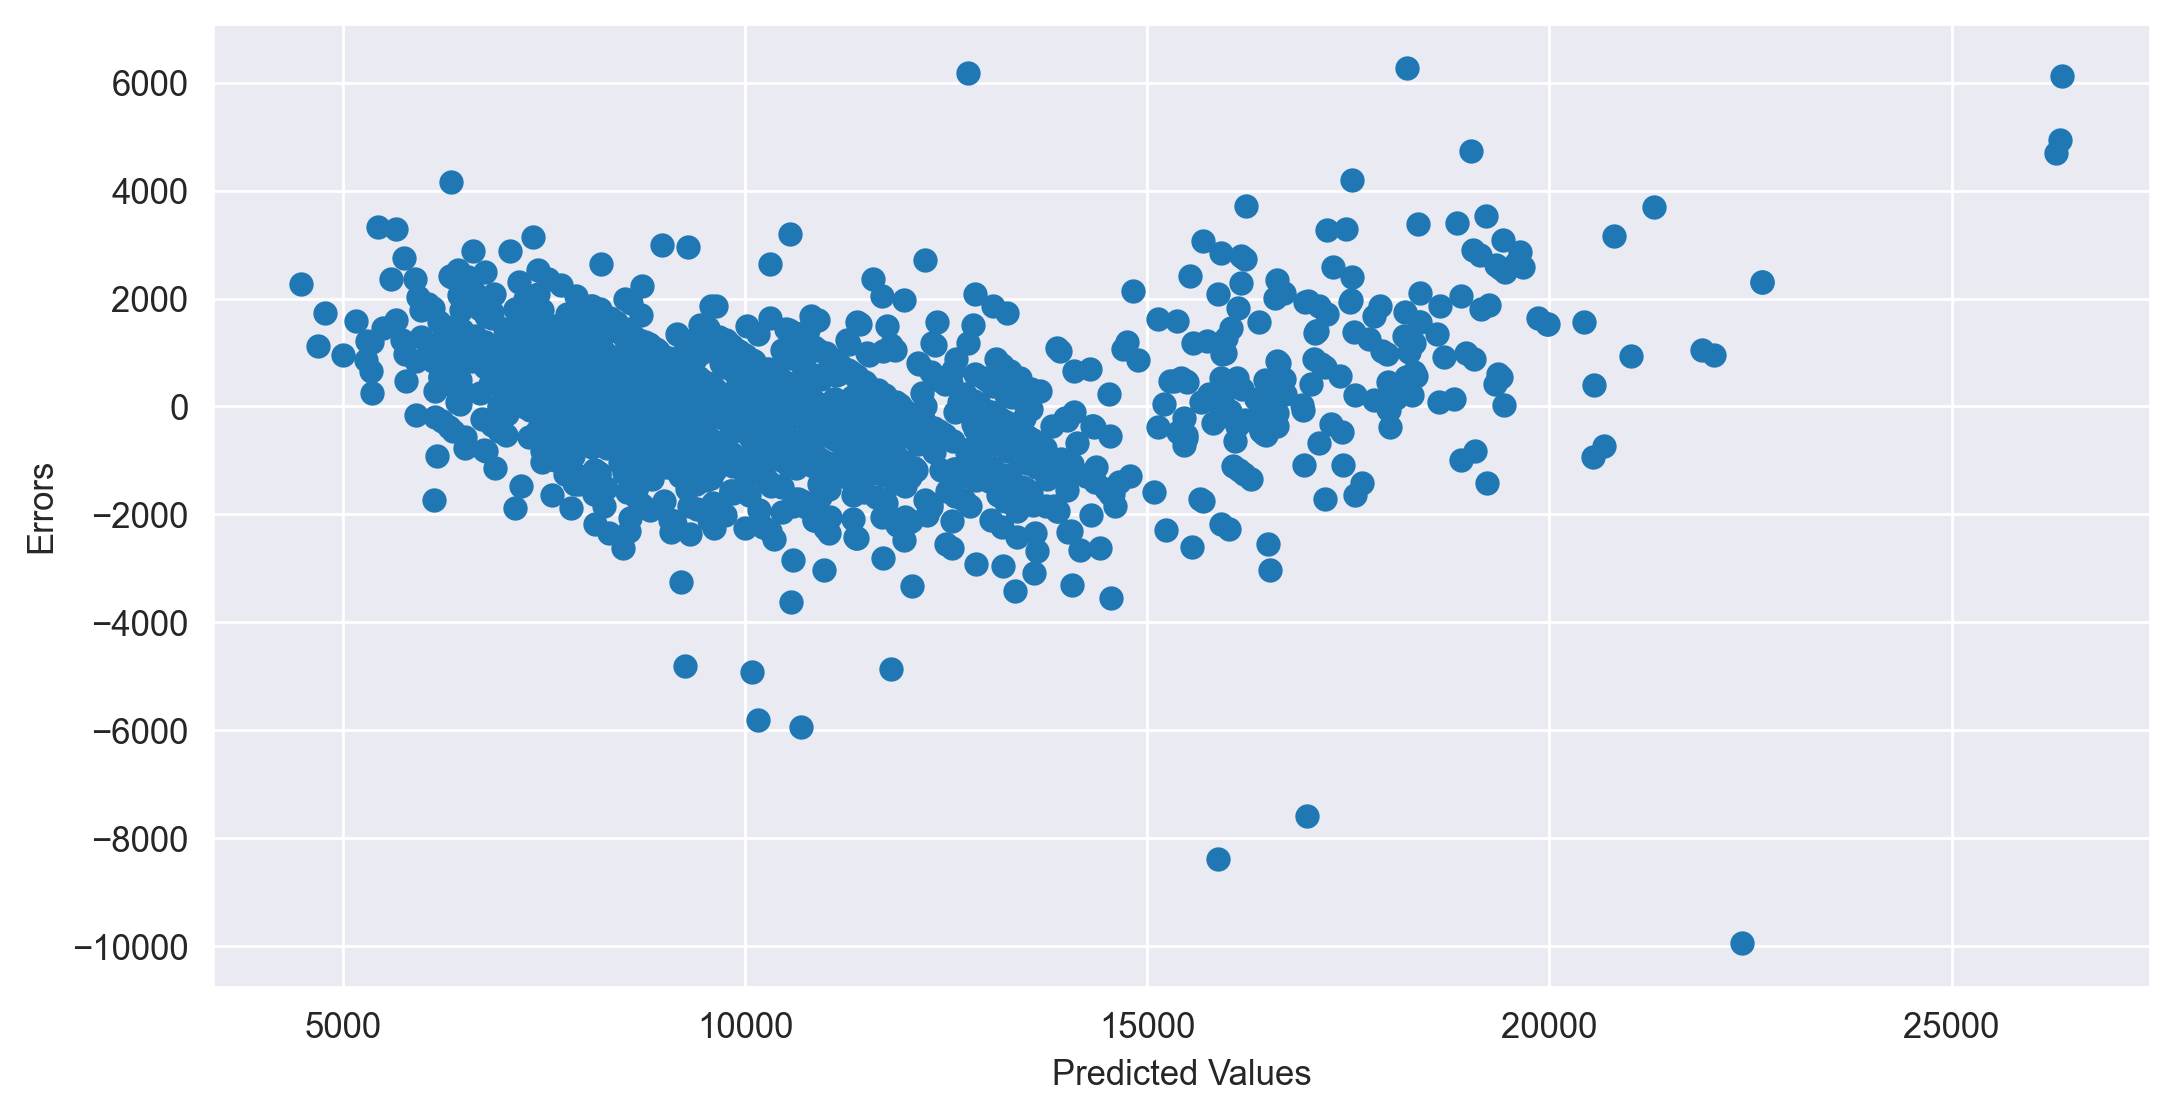

In [87]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')

## 3) Residual vs Regressor(x) ##

ValueError: specify slope and intercepty or model_results

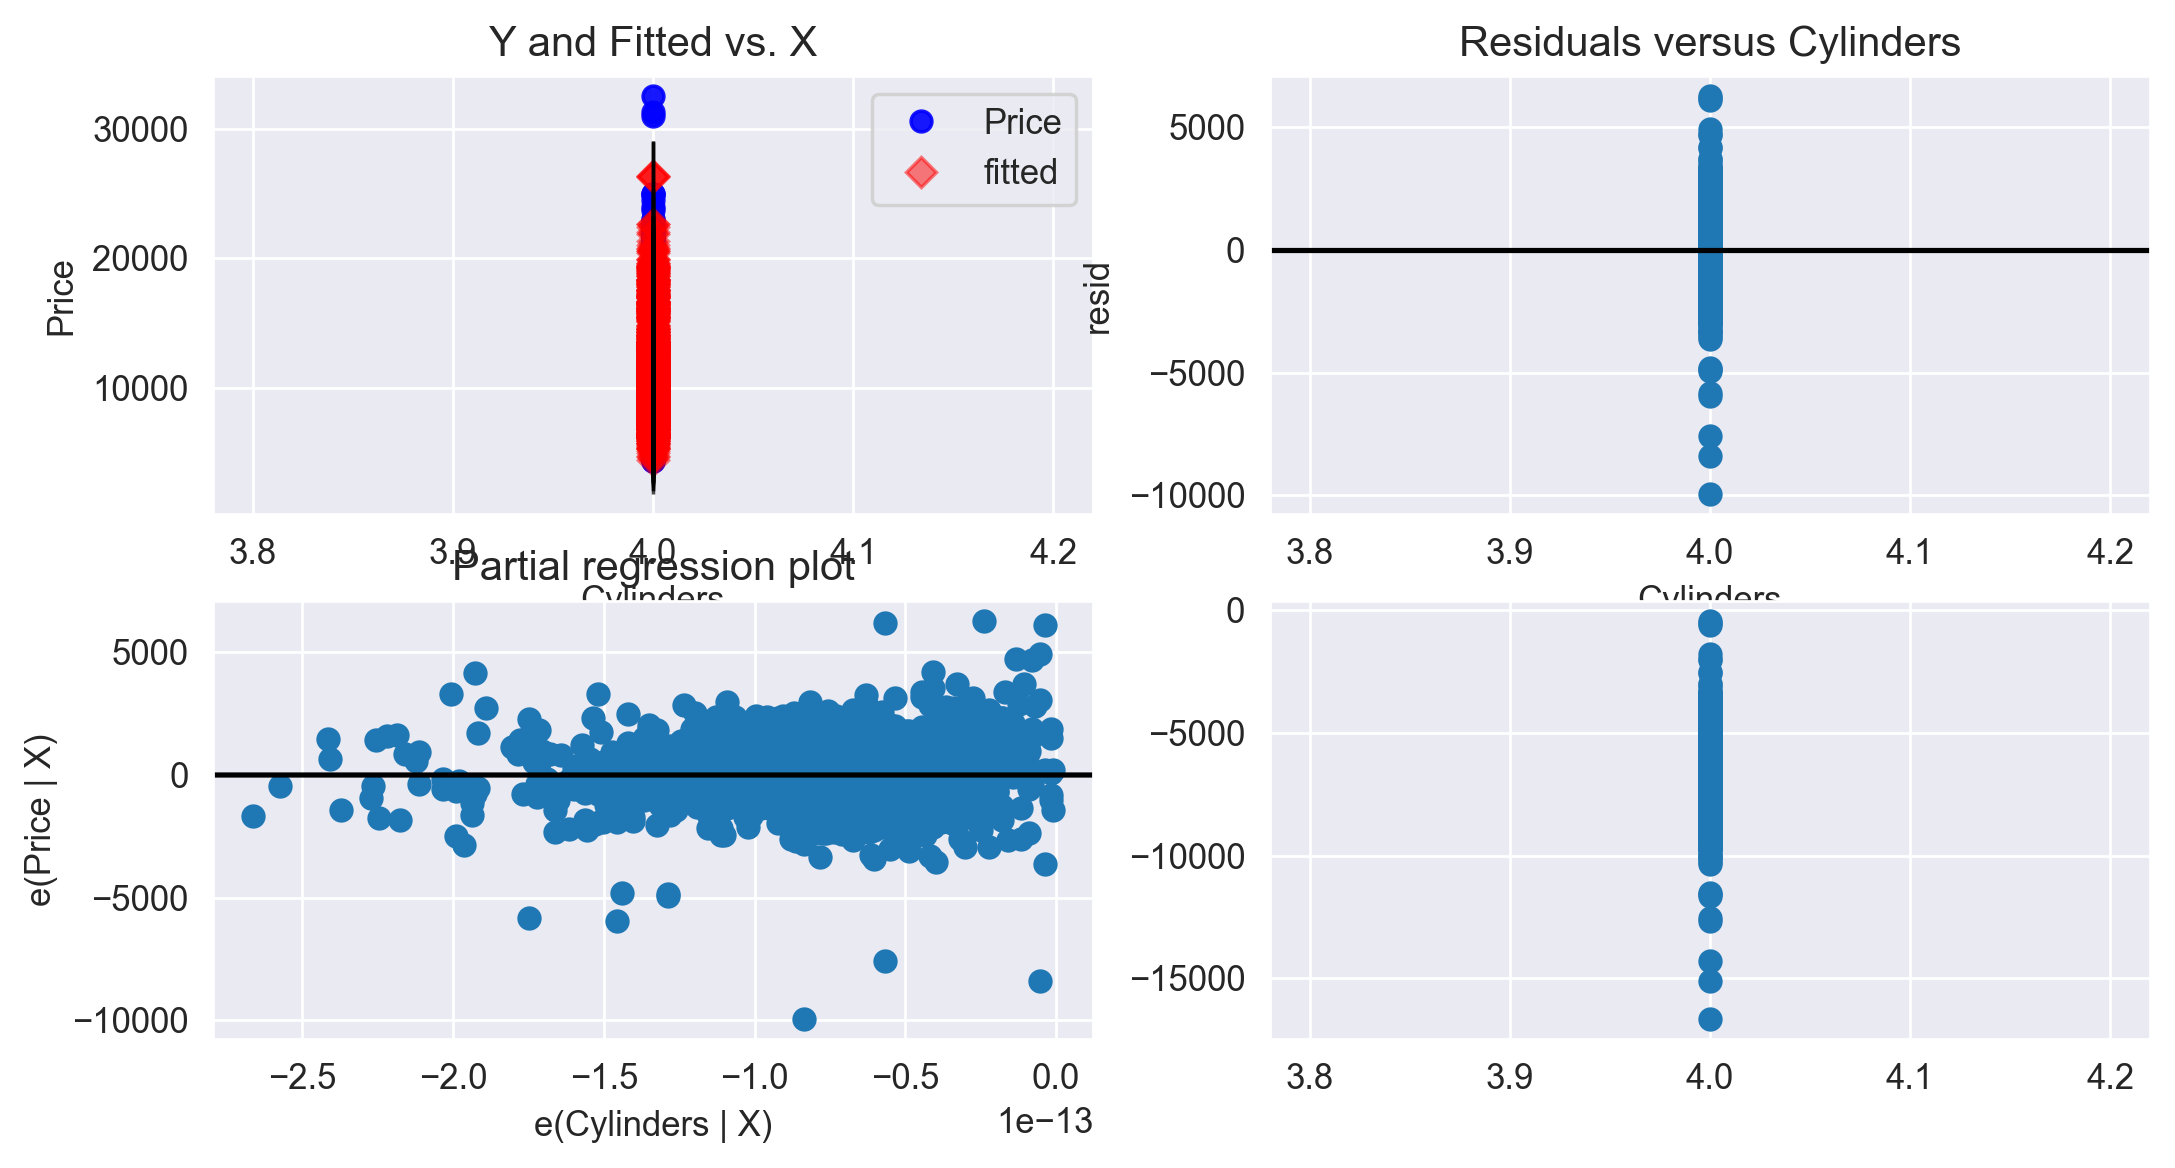

In [89]:

sm.graphics.plot_regress_exog(model,'Cylinders');

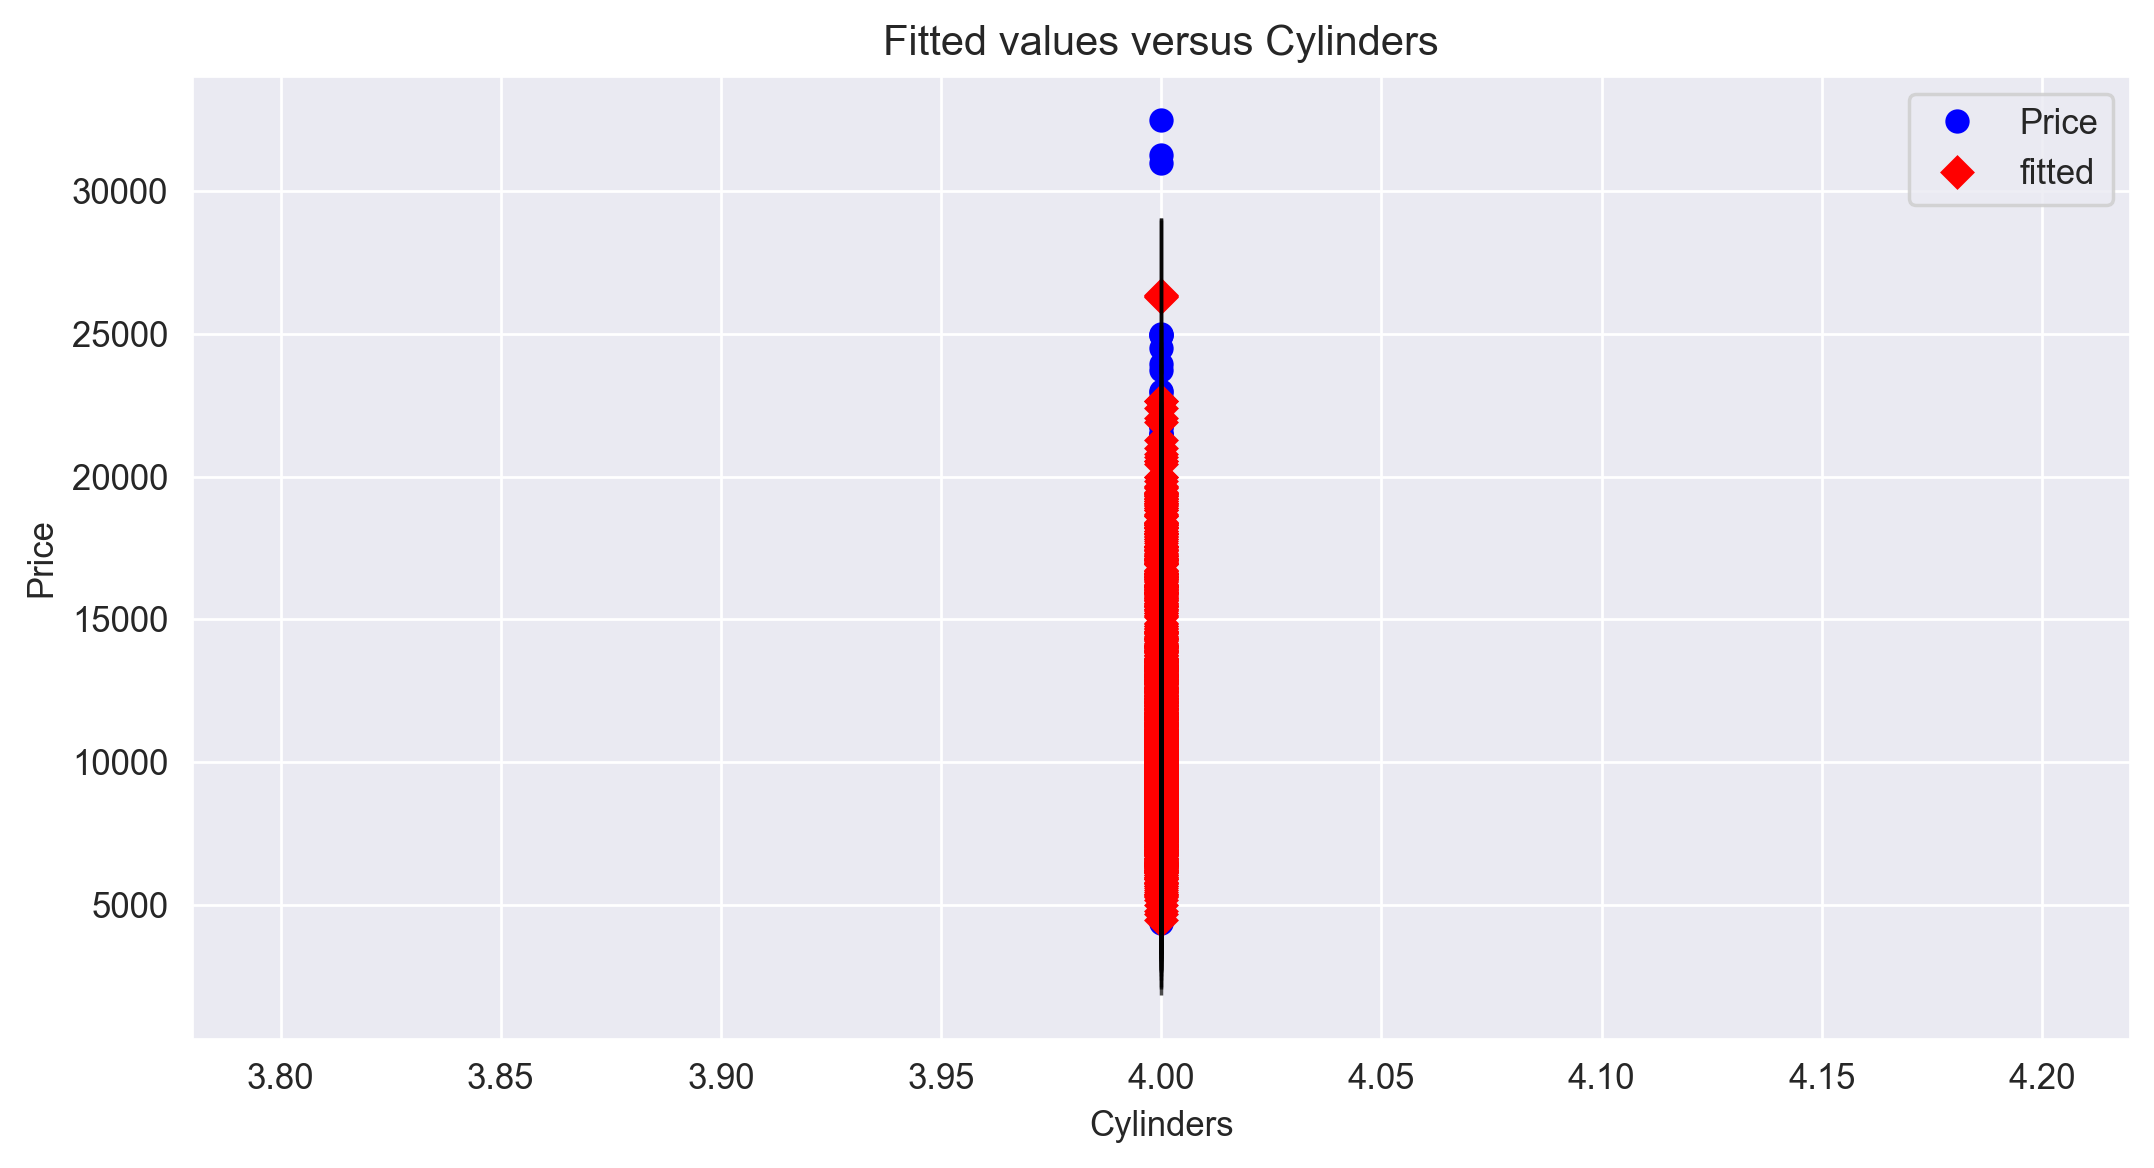

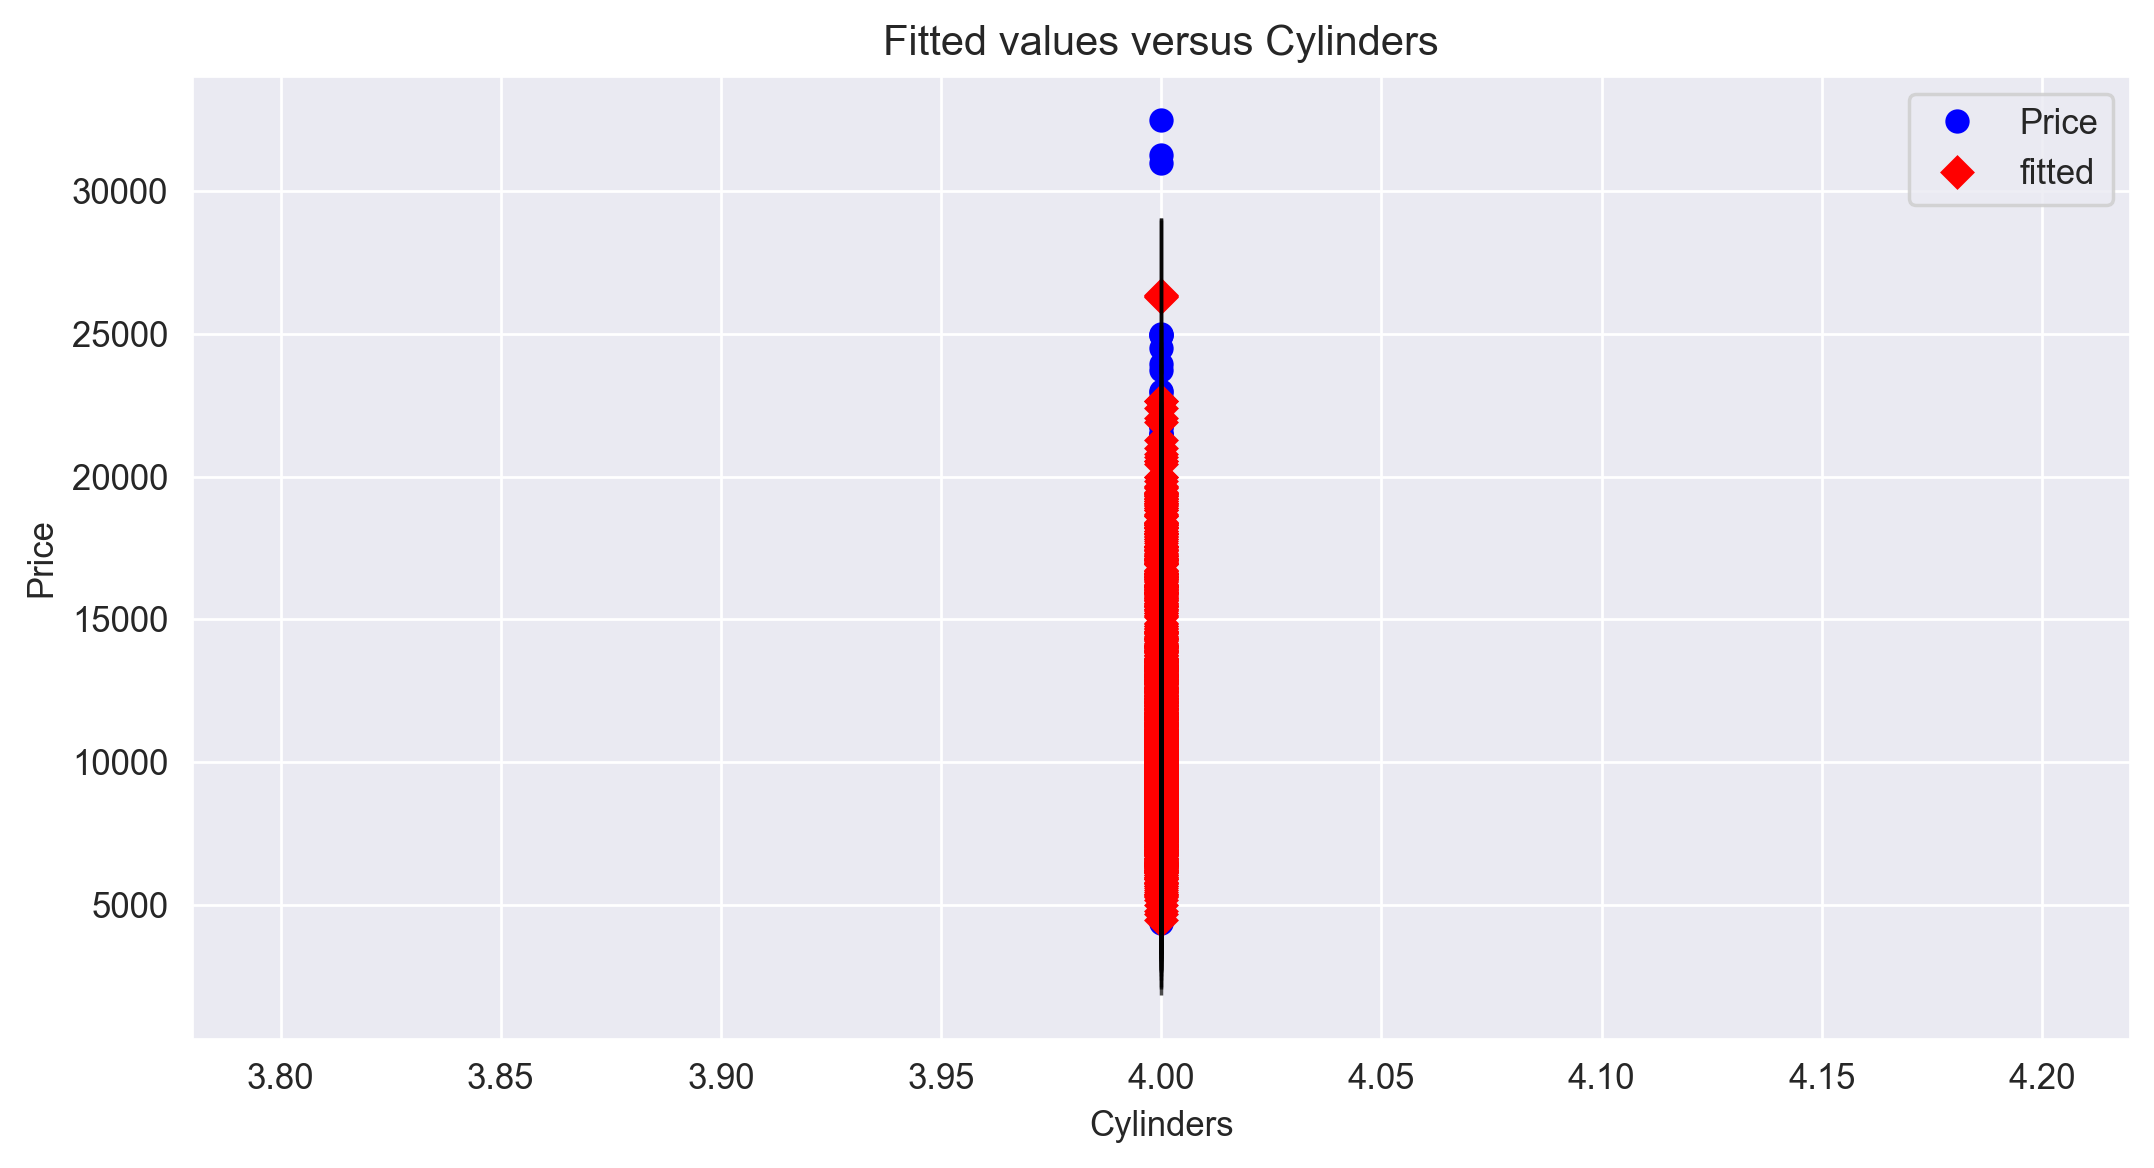

In [91]:

sm.graphics.plot_fit(model,'Cylinders')

## Model Deletion Techinques##

In [93]:
model

In [95]:

inf = model.get_influence()

In [97]:

c,p = inf.cooks_distance

In [99]:
c

array([3.45450419e-03, 1.97337382e-03, 2.48179275e-03, ...,
       7.00347335e-06, 5.50489688e-04, 8.50353386e-03])

Text(0, 0.5, "Cook's Distance")

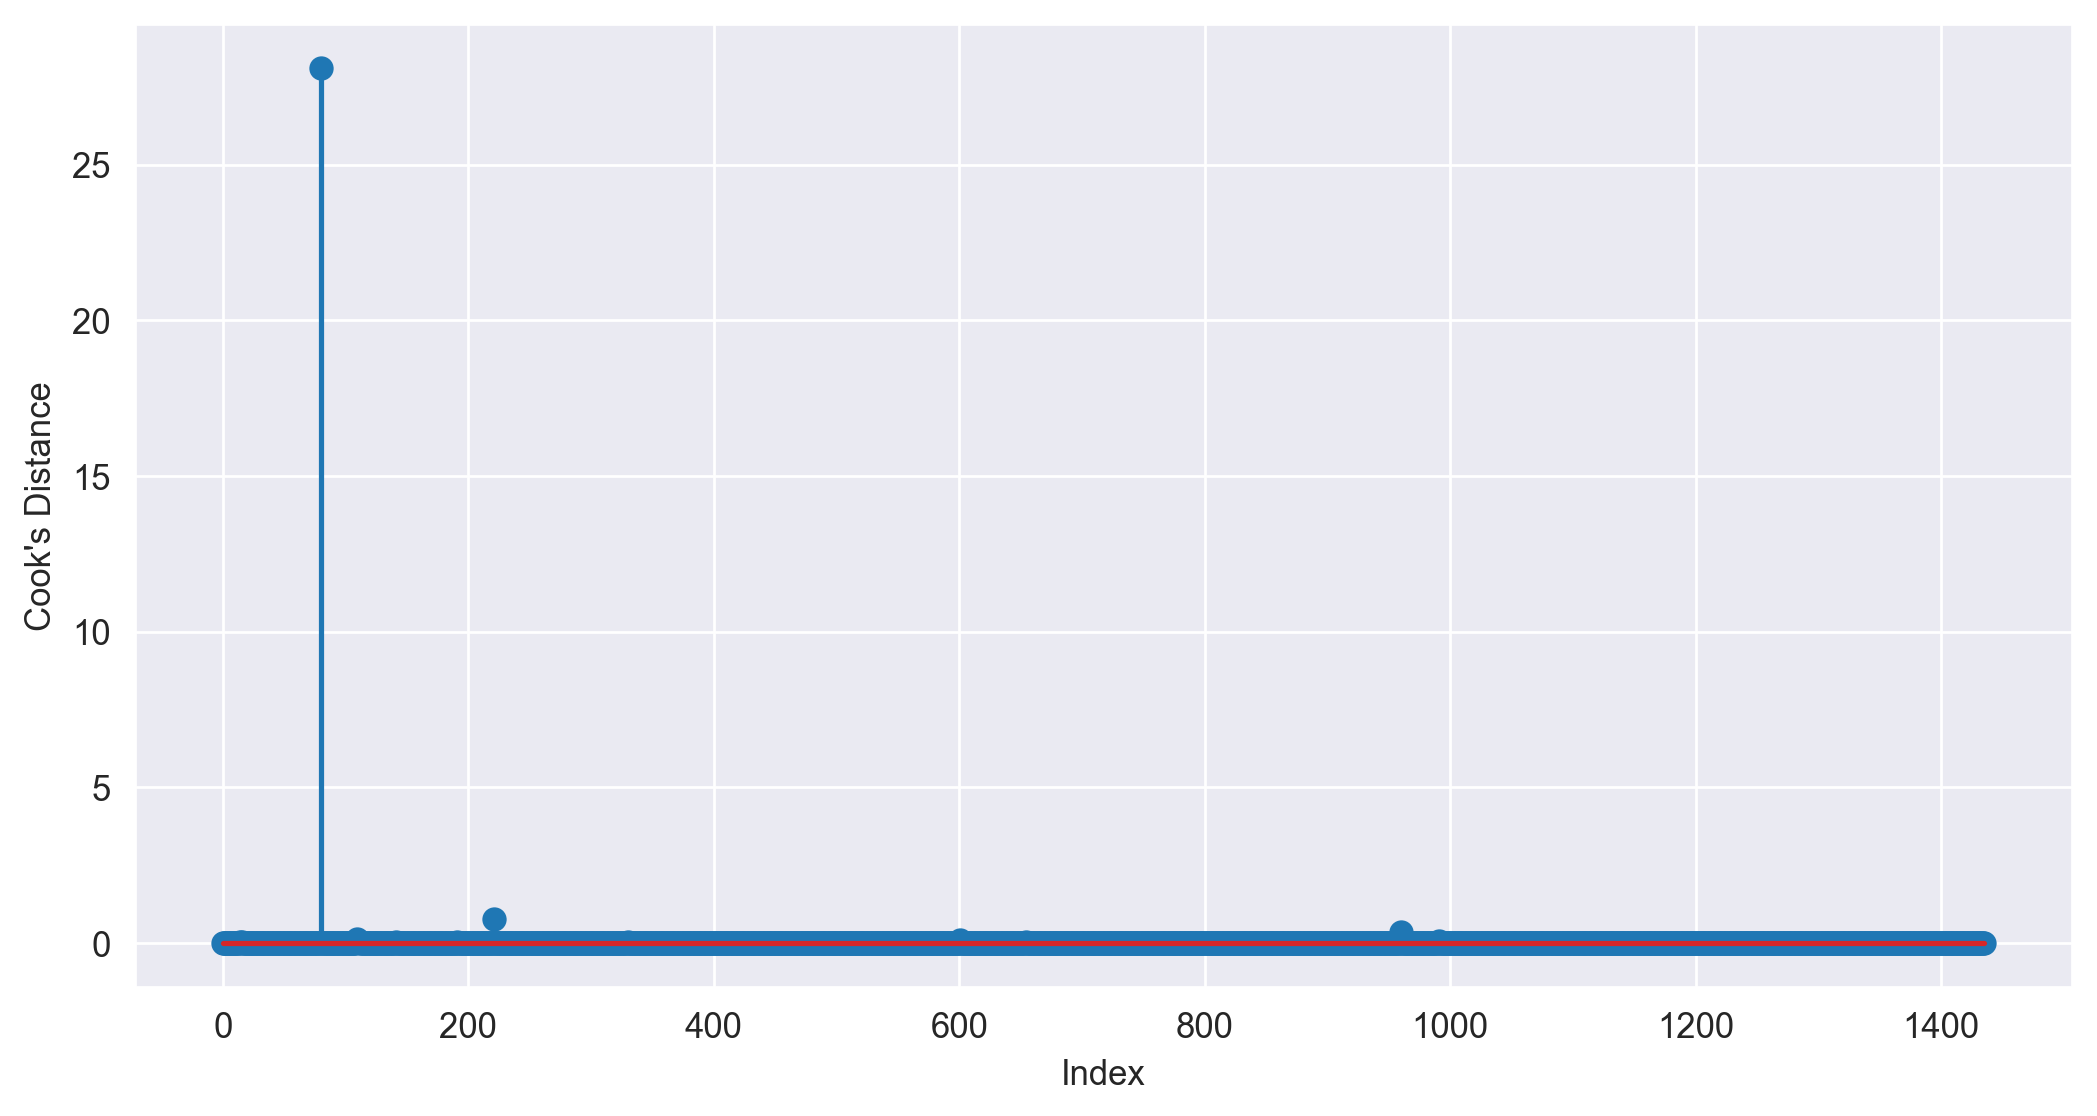

In [101]:
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')

In [103]:
np.argmax(c), np.max(c)

(80, 28.097164766992197)

In [105]:
df.iloc[[80]]

Price  Age     KM   HP  Automatic     cc  Doors  Cylinders  Gears  Weight
80  18950   25  20019  110          1  16000      5          4      5    1180

In [107]:
df.head()

Price  Age     KM  HP  Automatic    cc  Doors  Cylinders  Gears  Weight
0  13500   23  46986  90          0  2000      3          4      5    1165
1  13750   23  72937  90          0  2000      3          4      5    1165
2  13950   24  41711  90          0  2000      3          4      5    1165
3  14950   26  48000  90          0  2000      3          4      5    1165
4  13750   30  38500  90          0  2000      3          4      5    1170

In [109]:
# Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

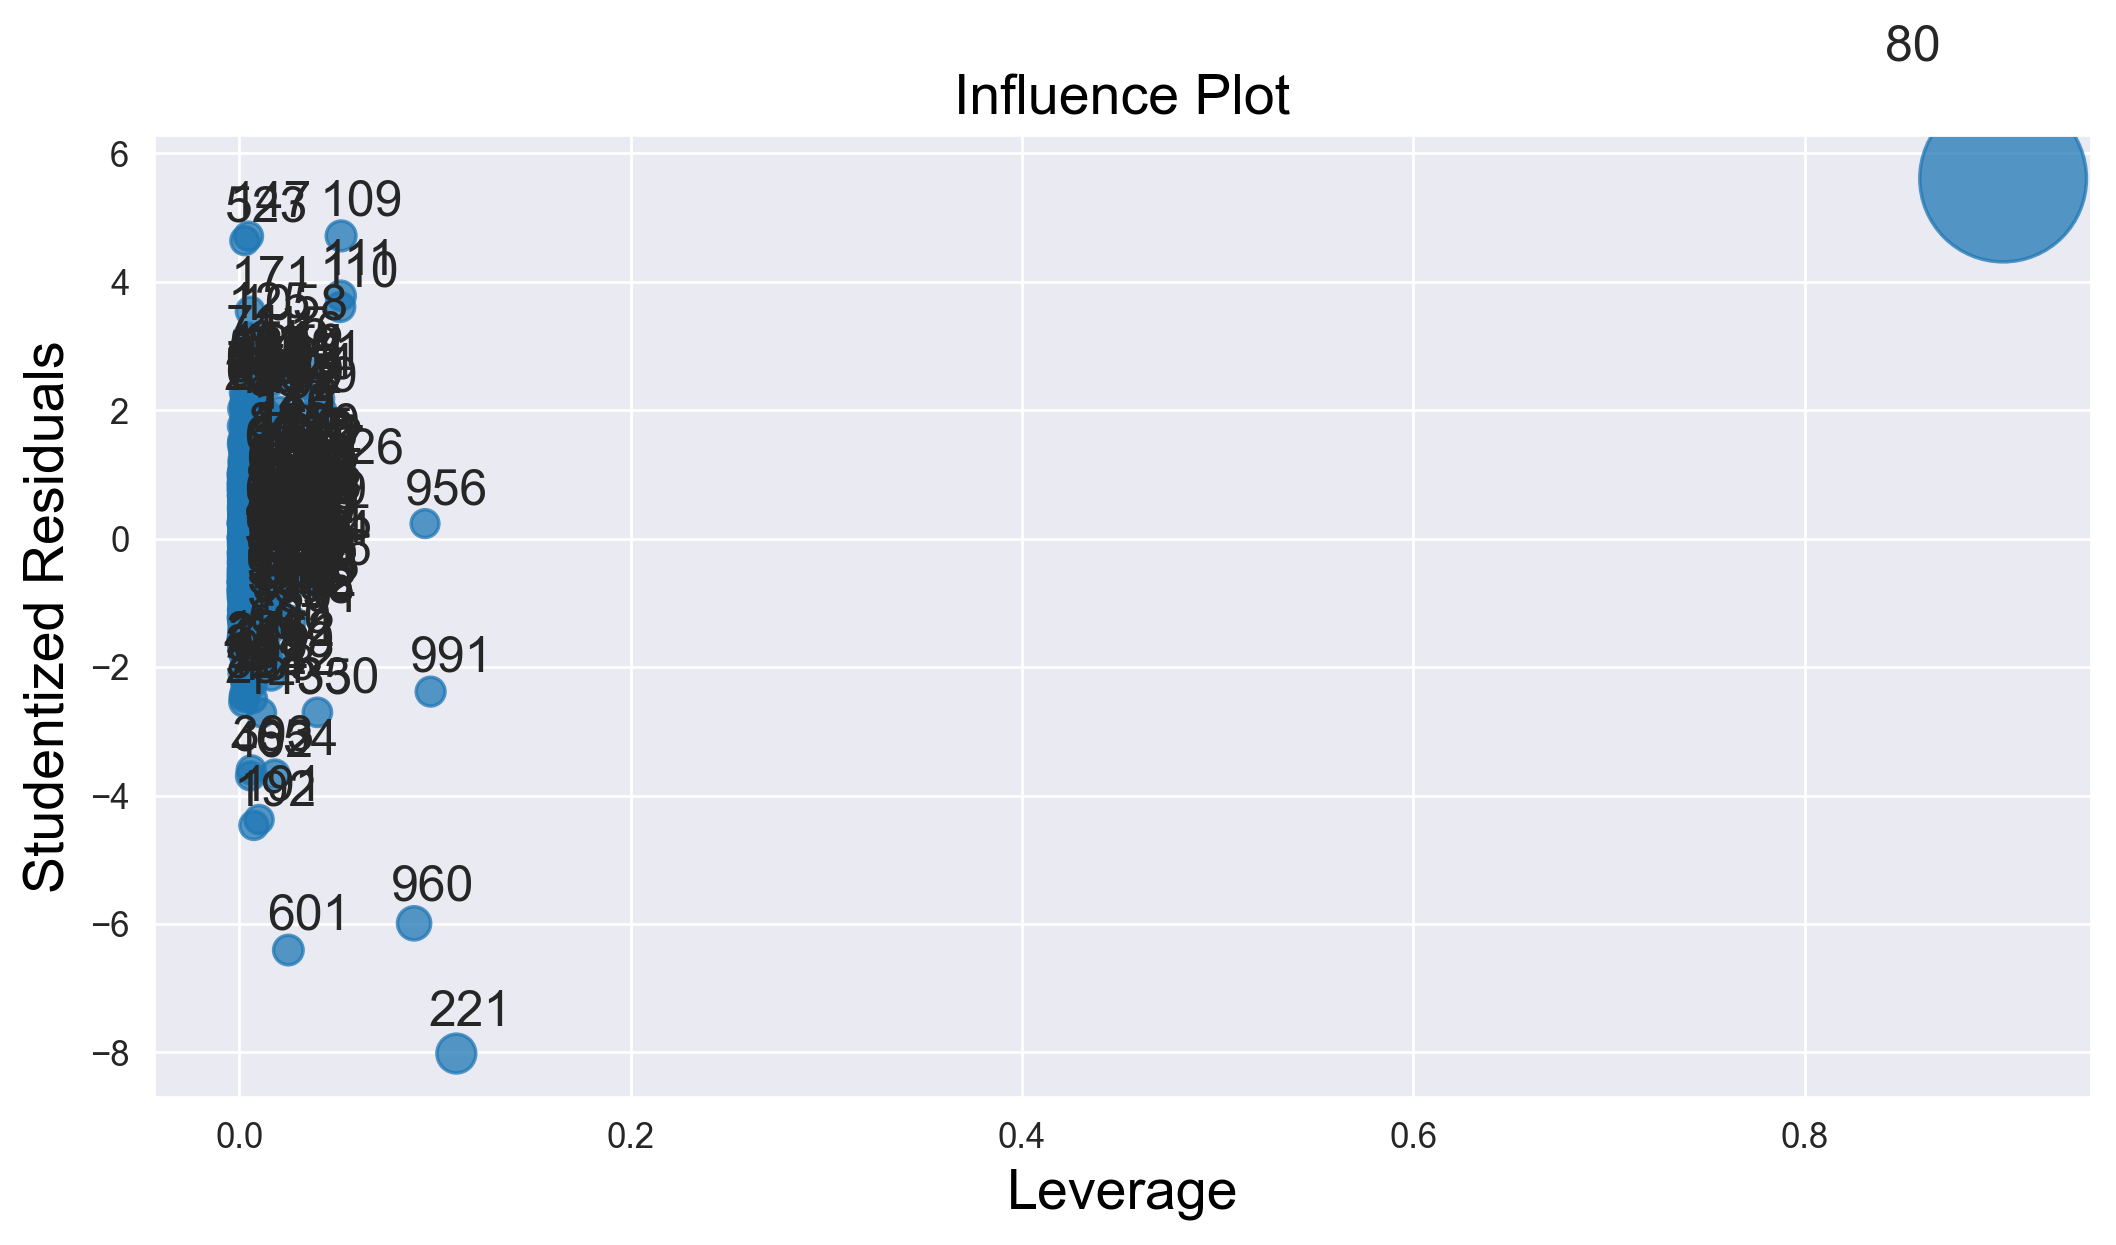

In [111]:
influence_plot(model);

In [113]:
# Calculate cutoff
k = len(df.columns) 
n = len(df) 

leverage = 3 * (k + 1) / n
leverage

0.02298050139275766

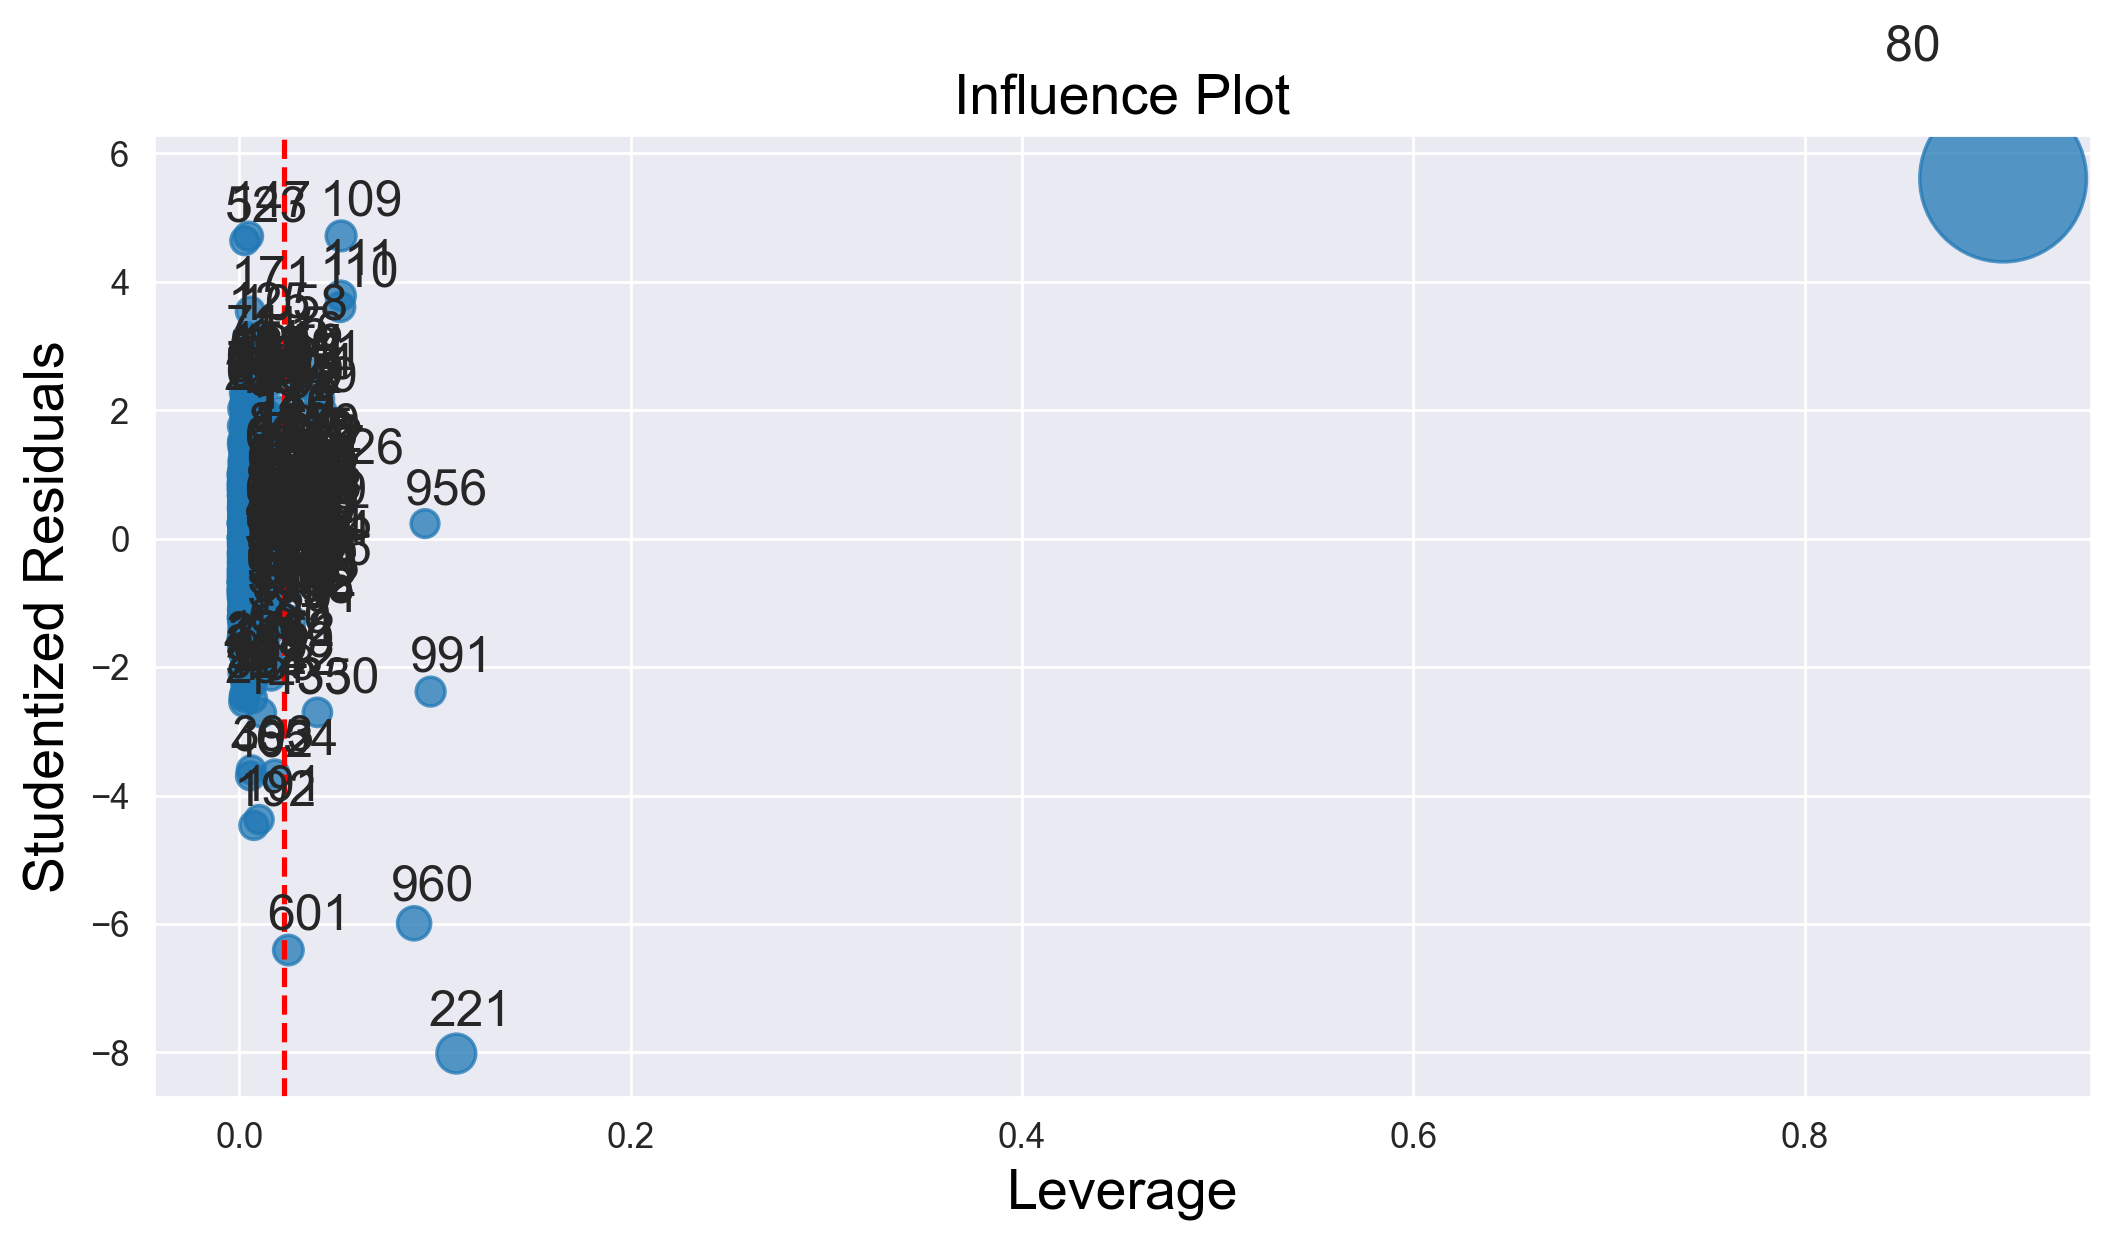

In [115]:
influence_plot(model)
plt.axvline(leverage, linestyle = '--', color = 'red')

## Improving the Model##

In [117]:
df.drop(index=80,inplace=True)

In [119]:
df

Price  Age     KM   HP  Automatic    cc  Doors  Cylinders  Gears  Weight
0     13500   23  46986   90          0  2000      3          4      5    1165
1     13750   23  72937   90          0  2000      3          4      5    1165
2     13950   24  41711   90          0  2000      3          4      5    1165
3     14950   26  48000   90          0  2000      3          4      5    1165
4     13750   30  38500   90          0  2000      3          4      5    1170
...     ...  ...    ...  ...        ...   ...    ...        ...    ...     ...
1431   7500   69  20544   86          0  1300      3          4      5    1025
1432  10845   72  19000   86          0  1300      3          4      5    1015
1433   8500   71  17016   86          0  1300      3          4      5    1015
1434   7250   70  16916   86          0  1300      3          4      5    1015
1435   6950   76      1  110          0  1600      5          4      5    1114

[1435 rows x 10 columns]

In [121]:
# Reset the index
df.reset_index(inplace=True)

In [123]:
df

index  Price  Age     KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
0         0  13500   23  46986   90          0  2000      3          4      5   
1         1  13750   23  72937   90          0  2000      3          4      5   
2         2  13950   24  41711   90          0  2000      3          4      5   
3         3  14950   26  48000   90          0  2000      3          4      5   
4         4  13750   30  38500   90          0  2000      3          4      5   
...     ...    ...  ...    ...  ...        ...   ...    ...        ...    ...   
1430   1431   7500   69  20544   86          0  1300      3          4      5   
1431   1432  10845   72  19000   86          0  1300      3          4      5   
1432   1433   8500   71  17016   86          0  1300      3          4      5   
1433   1434   7250   70  16916   86          0  1300      3          4      5   
1434   1435   6950   76      1  110          0  1600      5          4      5   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170  
...      ...  
1430    1025  
1431    1015  
1432    1015  
1433    1015  
1434    1114  

[1435 rows x 11 columns]

In [125]:
df.drop(columns=['index'],inplace=True)

In [127]:
df

Price  Age     KM   HP  Automatic    cc  Doors  Cylinders  Gears  Weight
0     13500   23  46986   90          0  2000      3          4      5    1165
1     13750   23  72937   90          0  2000      3          4      5    1165
2     13950   24  41711   90          0  2000      3          4      5    1165
3     14950   26  48000   90          0  2000      3          4      5    1165
4     13750   30  38500   90          0  2000      3          4      5    1170
...     ...  ...    ...  ...        ...   ...    ...        ...    ...     ...
1430   7500   69  20544   86          0  1300      3          4      5    1025
1431  10845   72  19000   86          0  1300      3          4      5    1015
1432   8500   71  17016   86          0  1300      3          4      5    1015
1433   7250   70  16916   86          0  1300      3          4      5    1015
1434   6950   76      1  110          0  1600      5          4      5    1114

[1435 rows x 10 columns]

In [129]:
final_model = smf.ols('Price~Age+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight', data=df).fit()

In [131]:
final_model.rsquared

0.8659025219624724

## Testing Dataset##

In [133]:
X_test

Age     KM   HP  Automatic    cc  Doors  Cylinders  Gears  Weight
30     29   9750   97          0  1400      3          4      5    1100
523    49  49568  110          0  1600      3          4      5    1105
732    60  85000   86          0  1300      3          4      5    1025
85     28   8537  110          0  1600      5          4      5    1130
324    39  34599  110          0  1600      5          4      5    1075
...   ...    ...  ...        ...   ...    ...        ...    ...     ...
1318   78  67255  110          0  1600      5          4      5    1085
539    52  46449  110          0  1600      4          4      5    1035
1220   70  85000  110          0  1600      3          4      5    1055
146    20  20000  110          1  1600      5          4      5    1165
877    58  62024  110          0  1600      5          4      5    1075

[288 rows x 9 columns]

In [135]:
y_test

30      12950
523     18950
732     10500
85      17450
324     12950
        ...  
1318     8500
539     11750
1220     7900
146     20500
877      9950
Name: Price, Length: 288, dtype: int64

In [137]:
final_model.params

Intercept    -519.807966
Age          -122.483416
KM             -0.016949
HP             30.732106
Automatic     239.203361
cc             -1.590993
Doors         -30.149690
Cylinders   -2079.231863
Gears         629.080656
Weight         22.285992
dtype: float64

In [139]:
final_model.predict(X_test)

30      15769.160980
523     12837.360257
732      8846.348328
85      16601.802945
324     13587.027103
            ...     
1318     8479.542376
539     10932.605301
1220     8550.366685
146     18406.595246
877     10795.011782
Length: 288, dtype: float64

## lasso and Ridge Methods##

In [143]:
lr = LinearRegression()
lr.fit(X_train,y_train)
ypred = lr.predict(X_test)
ypred
                                

array([15428.83195617, 12599.76800724,  8685.96201018, 16446.50792681,
       13723.68922133,  5765.32538537, 10364.25026699, 16071.4648485 ,
        8198.33651779,  9424.54514131, 12873.74936604,  7496.76993045,
       11397.01540433,  9277.33423265, 12004.70737054,  8618.71570473,
       10743.48944814, 13885.39460834, 16529.10135265, 19087.28327733,
        9866.29177384,  9103.9261813 , 12659.70874597, 14616.47708506,
        8236.85910953, 10723.78194044,  8568.87905194, 10943.14250222,
        9771.94077619, 12125.22387486,  9246.78197574,  5423.99176368,
       10471.3730345 , 11368.2271524 ,  6812.09166201,  7576.71229328,
        9913.17007766,  7904.58270753, 11023.60424525,  7678.41519254,
       11994.91995515, 13279.82041182,  8330.80919169, 11447.28969834,
       10800.45566716, 10338.34528249, 13445.79024183, 10557.79200879,
       17249.07435781,  6901.65037234,  8854.45099949, 10305.58847796,
        7694.63858165,  7775.32082607,  9359.64519067, 11931.10292472,
      

In [145]:
lr.intercept_ 

-3547.613998574734

In [147]:
lr.coef_

array([-1.26899438e+02, -1.78544958e-02,  2.66138211e+01,  2.66416740e+02,
       -2.22595555e-02,  2.88135375e+01,  1.32160949e-12,  5.92354559e+02,
        1.56654730e+01])

In [149]:
lr.score(X_train,y_train),lr.score(X_test,y_test)

(0.8631825658890249, 0.8571890349358413)

In [ ]:
## LASSO REGRESSION##

In [151]:

l1 = Lasso() 
l1.fit(X_train,y_train)
l1.score(X_train,y_train),l1.score(X_test,y_test)

(0.8631773546597844, 0.8570602440438527)

In [153]:
l1.coef_

array([-1.26848279e+02, -1.78657474e-02,  2.67093906e+01,  2.40627282e+02,
       -2.12234379e-02,  2.59370583e+01,  0.00000000e+00,  5.56992195e+02,
        1.56901989e+01])

## Hyperparameter Tuning##

In [167]:
for i in range(100,200): 
  l1 = Lasso(alpha = i)
  l1.fit(X_train,y_train)
  print(f"Alpha: {i} Train: {l1.score(X_train,y_train)} Test: {l1.score(X_test,y_test)}")

Alpha: 100 Train: 0.8620946438846512 Test: 0.8543462240005473
Alpha: 101 Train: 0.8620944789438257 Test: 0.8543451359999089
Alpha: 102 Train: 0.8620943123614444 Test: 0.854344046583962
Alpha: 103 Train: 0.8620941441375072 Test: 0.8543429557527065
Alpha: 104 Train: 0.8620939742720141 Test: 0.8543418635061424
Alpha: 105 Train: 0.862093802764965 Test: 0.8543407698442697
Alpha: 106 Train: 0.8620936296163599 Test: 0.8543396747670884
Alpha: 107 Train: 0.8620934548261991 Test: 0.8543385782745986
Alpha: 108 Train: 0.8620932783944822 Test: 0.8543374803668001
Alpha: 109 Train: 0.8620931003212096 Test: 0.8543363810436931
Alpha: 110 Train: 0.8620929206063808 Test: 0.8543352803052776
Alpha: 111 Train: 0.8620927392499962 Test: 0.8543341781515534
Alpha: 112 Train: 0.8620925562520558 Test: 0.8543330745825208
Alpha: 113 Train: 0.8620923716125592 Test: 0.8543319695981795
Alpha: 114 Train: 0.862092185331507 Test: 0.8543308631985296
Alpha: 115 Train: 0.8620919974088987 Test: 0.8543297553835713
Alpha: 116 

In [171]:
l1 = Lasso(alpha = 160) 
l1.fit(X_train,y_train)
l1.score(X_train,y_train),l1.score(X_test,y_test)

(0.8620818489543969, 0.854278293246221)

In [173]:
l1.coef_

array([-1.25723365e+02, -1.81588673e-02,  2.73113555e+01,  0.00000000e+00,
       -7.49400719e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.59569539e+01])

In [177]:
X_train.columns

Index(['Age', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears',
       'Weight'],
      dtype='object')

From the lasso regression we can discard four columns i.e.Automatic,Doors,Cylinders,Gears

## Ridge Regression ##

In [179]:
l2 = Ridge()
l2.fit(X_train,y_train)
l2.score(X_train,y_train),l1.score(X_test,y_test)

(0.8631817752767756, 0.854278293246221)

In [181]:
for i in range(1,100):
  l2 = Ridge(alpha = i)
  l2.fit(X_train,y_train)
  print(f"Alpha: {i} Train: {l2.score(X_train,y_train)} Test: {l2.score(X_test,y_test)}")

Alpha: 1 Train: 0.8631817752767756 Test: 0.8571396527910873
Alpha: 2 Train: 0.8631795682358134 Test: 0.8570916254104387
Alpha: 3 Train: 0.863176163693206 Test: 0.8570449406132558
Alpha: 4 Train: 0.8631717478705818 Test: 0.8569995785634797
Alpha: 5 Train: 0.8631664795712293 Test: 0.8569555137550932
Alpha: 6 Train: 0.863160494529007 Test: 0.8569127165670908
Alpha: 7 Train: 0.8631539090011641 Test: 0.8568711544814873
Alpha: 8 Train: 0.8631468227487867 Test: 0.8568307930366903
Alpha: 9 Train: 0.863139321518932 Test: 0.8567915965724411
Alpha: 10 Train: 0.8631314791194377 Test: 0.8567535288101731
Alpha: 11 Train: 0.8631233591593671 Test: 0.8567165533031498
Alpha: 12 Train: 0.8631150165138581 Test: 0.8566806337834019
Alpha: 13 Train: 0.8631064985609405 Test: 0.8566457344267788
Alpha: 14 Train: 0.8630978462289758 Test: 0.8566118200529907
Alpha: 15 Train: 0.8630890948862728 Test: 0.8565788562740312
Alpha: 16 Train: 0.8630802750987223 Test: 0.8565468096016374
Alpha: 17 Train: 0.8630714132767181 

In [183]:
l2 = Ridge(alpha = 90)
l2.fit(X_train,y_train)
l2.score(X_train,y_train),l2.score(X_test,y_test)

(0.8626320244713941, 0.8554298489073513)

In [185]:
l2.coef_

array([-1.26568770e+02, -1.78573330e-02,  2.77423262e+01,  8.15413738e+01,
       -1.50818534e-02,  9.45806673e+00,  0.00000000e+00,  1.66573848e+02,
        1.58257433e+01])